<img src="image/Capa.png" alt="ebac-logo">

---

# **Brescia** | Python: DataSet Global Peace Index 2023 

Caderno de **Códigos**<br> 
Desenvolvedor [Enzo Schitini](https://enzo-schitini.bubbleapps.io/version-test/)

---

## -> `Definição`

### `Sobre a função do programa`

Olá, meu nome é `Enzo Schtini` e quero compartilhar `Imola` com você. É um algoritmo que revela dados incríveis sobre ‘exoplanetas e a temperatura das estrelas’.

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from functools import reduce

index_csv = './index.csv'

### `1° Análise exploratória`

##### Contexto

...

| Coluna  | Descrição |
| ------- | --------- |
| Country      | Nome do pais |
| iso3c | Nome abreviado |
| year   | --- |
| Overall Scores    | Pontuação geral da Itália no Índice Global de Paz. Uma pontuação mais alta indica um comportamento mais positivo. |
| Safety and Security | Segurança e proteção na Itália. Inclui vários factores como o nível de criminalidade, a presença de forças de segurança internas e externas e a percepção de segurança dos cidadãos. |
| Ongoing Conflict | Conflitos em curso na Itália ou envolvendo a Itália. Inclui factores como o número de conflitos, a duração dos conflitos e o impacto dos conflitos na população e na economia. |
| Militarian | Aspecto militar na Itália. Inclui factores como os gastos militares, o número de militares e o compromisso da Itália com as operações militares internacionais. |

In [90]:
def valore_abbreviato(valore:str) -> str:
    alg_valore = list(valore)
    num_punt = sum(map(lambda x: x == '.', valore))
    for x in range(num_punt):
     alg_valore.remove('.')
    numero = int("".join(alg_valore))
    numero_format = "{:,}".format(numero).replace(",", ".")
    return numero_format

In [91]:
df = pd.read_csv(index_csv, na_values='na')

struttura = df.shape
struttura = str(struttura).replace('(', '').replace(')', '')
struttura = str(struttura).strip().split(sep=',')
print(f'Data information: {valore_abbreviato(struttura[0])} lines and {valore_abbreviato(struttura[1])} columns.')

Data information: 5.112 lines and 13 columns.


In [92]:
df.dtypes

Country                          object
iso3c                            object
year                             object
Overall Scores                   object
Safety and Security              object
Ongoing Conflict                 object
MilitarianDominican Republic     object
DOM                              object
2008                            float64
1.987                           float64
2.622                           float64
1.213                           float64
1.939                           float64
dtype: object

- Atributos **categóricos**.

In [93]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Country,5112,164,Qatar,32
iso3c,5112,164,QAT,32
year,5112,17,2016,326
Overall Scores,5112,1275,2.019,16
Safety and Security,5112,1462,2.495,16
Ongoing Conflict,5112,842,1.403,456
MilitarianDominican Republic,5112,1154,2.039,20
DOM,1,1,DZA,1


- Atributos **numéricos**.

In [94]:
df.drop('Country', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2008,1.0,2008.000,NaN,2008.000,2008.000,2008.000,2008.000,2008.000
1.987,1.0,2.253,NaN,2.253,2.253,2.253,2.253,2.253
2.622,1.0,2.524,NaN,2.524,2.524,2.524,2.524,2.524
1.213,1.0,2.111,NaN,2.111,2.111,2.111,2.111,2.111
1.939,1.0,2.027,NaN,2.027,2.027,2.027,2.027,2.027


##### Dados ausentes

In [95]:
df.isna().any()

Country                         False
iso3c                           False
year                            False
Overall Scores                  False
Safety and Security             False
Ongoing Conflict                False
MilitarianDominican Republic    False
DOM                              True
2008                             True
1.987                            True
2.622                            True
1.213                            True
1.939                            True
dtype: bool

In [96]:
class ArquivoCSV(object):

  def __init__(self, arquivo: str):
    self.arquivo = arquivo
    self.conteudo = self._extrair_conteudo()
    self.colunas = self._extrair_nome_colunas()

  def _extrair_conteudo(self):
    conteudo = None
    with open(file=self.arquivo, mode='r', encoding='utf8') as arquivo:
      conteudo = arquivo.readlines()
    return conteudo

  def _extrair_nome_colunas(self):
    return self.conteudo[0].strip().split(sep=',')

  def extrair_coluna(self, indice_coluna: str):
    coluna = list()
    for linha in self.conteudo:
      conteudo_linha = linha.strip().split(sep=',')
      coluna.append(conteudo_linha[indice_coluna])
    coluna.pop(0)
    return coluna

- A função abaixo gera algumas estatísticas sobre as colunas de dados ausentes.

In [97]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantity': qtd, "percentage": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [98]:
stats_dados_faltantes(df=df)

{'DOM': {'quantity': 5111, 'percentage': 99.98}}
{'2008': {'quantity': 5111, 'percentage': 99.98}}
{'1.987': {'quantity': 5111, 'percentage': 99.98}}
{'2.622': {'quantity': 5111, 'percentage': 99.98}}
{'1.213': {'quantity': 5111, 'percentage': 99.98}}
{'1.939': {'quantity': 5111, 'percentage': 99.98}}


### `2° Limpeza de dados`

- Agora vamos remover todos os países que possuem espaços vazios

In [99]:
def limp_csv(arquivo_csv : str):
   with open(file=arquivo_csv, mode='w') as file:
      file.write("")

In [100]:
csv = ArquivoCSV('./index.csv')
csv = csv.extrair_coluna(0)
print(f'Numero iniziale: {len(csv)}')

def pulizia(archivio):
    file = []
    with open(file=archivio, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line_sep = line.split(sep=',')
            if line_sep[3] != '':
                file.append(line)
                line = fp.readline()
            else:
                line = fp.readline()
    limp_csv(archivio)

    with open(file=archivio, mode='a', encoding='utf-8') as fp:
        fp.write('Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian')
        for x in file:
            fp.write(x)

pulizia('./index.csv')
csv = ArquivoCSV('./index.csv')
csv = csv.extrair_coluna(0)
print(f'Numero finale: {len(csv)}')

Numero iniziale: 5112
Numero finale: 5111


### `3° Visualização de dados`

- Esta função se encarrega de obter dados de uma determinada coluna

In [101]:
def cattegorie(file, colonna:int):
    csv = ArquivoCSV(file)
    lista = list(set(csv.extrair_coluna(colonna)))
    return list(filter(None, lista))

In [102]:
print(f'Os dados vão de {min(cattegorie(index_csv, 2))} até {max(cattegorie(index_csv, 2))}, ao todo: {len(cattegorie(index_csv, 2))} anos de análise.')

Os dados vão de 2008 até year, ao todo: 17 anos de análise.


##### Dados dos país

- Vamos definir um país

In [103]:
paese_nome = 'Italy'

- Aqui podemos ter um resumo do desempenho do país em cada ano

In [104]:
def trovare_paese(paese:str) -> list:
    paesi = []
    with open(file=index_csv, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line = line.strip()
            line_x = line.split(sep=',')
            if line_x[0] == paese:
                paesi.append(line)
                line = fp.readline()
            else:
                line = fp.readline()
    return paesi

print(trovare_paese(paese_nome))
print(len(trovare_paese(paese_nome)))
trovare_paese(paese_nome)[0]

['Italy,ITA,2008,1.588,1.752,1.073,2.041', 'Italy,ITA,2009,1.673,1.948,1.08,2.033', 'Italy,ITA,2010,1.636,1.852,1.083,2.045', 'Italy,ITA,2011,1.655,1.932,1.073,1.996', 'Italy,ITA,2012,1.677,1.961,1.057,2.059', 'Italy,ITA,2013,1.703,2.028,1.057,2.045', 'Italy,ITA,2014,1.667,1.954,1.057,2.031', 'Italy,ITA,2015,1.668,2.014,1.062,1.919', 'Italy,ITA,2016,1.662,1.994,1.067,1.924', 'Italy,ITA,2017,1.649,1.973,1.064,1.913', 'Italy,ITA,2018,1.701,2.095,1.057,1.922', 'Italy,ITA,2019,1.676,2.018,1.055,1.96', 'Italy,ITA,2020,1.63,1.945,1.048,1.909', 'Italy,ITA,2021,1.65,1.969,1.041,1.957', 'Italy,ITA,2022,1.642,1.924,1.041,2.003', 'Italy,ITA,2023,1.662,1.93,1.046,2.07', 'Italy,ITA,2008,1.588,1.752,1.073,2.041', 'Italy,ITA,2009,1.673,1.948,1.08,2.033', 'Italy,ITA,2010,1.636,1.852,1.083,2.045', 'Italy,ITA,2011,1.655,1.932,1.073,1.996', 'Italy,ITA,2012,1.677,1.961,1.057,2.059', 'Italy,ITA,2013,1.703,2.028,1.057,2.045', 'Italy,ITA,2014,1.667,1.954,1.057,2.031', 'Italy,ITA,2015,1.668,2.014,1.062,1.919'

'Italy,ITA,2008,1.588,1.752,1.073,2.041'

- Agora vamos pegar os dados dos fatores

In [105]:
def calcoli_paese(paesi:list):

    overall_scores = []
    safety_security = []
    ongoing_conflict = []
    militarian = []

    for x in paesi:
        x = str(x)
        x_sep = x.split(sep=',')
        overall_scores.append((x_sep)[3])
        safety_security.append((x_sep)[4])
        ongoing_conflict.append((x_sep)[5])
        militarian.append((x_sep)[6])
    
    return overall_scores, safety_security, ongoing_conflict, militarian

overall_scores = calcoli_paese(trovare_paese(paese_nome))[0]
print(overall_scores)

['1.588', '1.673', '1.636', '1.655', '1.677', '1.703', '1.667', '1.668', '1.662', '1.649', '1.701', '1.676', '1.63', '1.65', '1.642', '1.662', '1.588', '1.673', '1.636', '1.655', '1.677', '1.703', '1.667', '1.668', '1.662', '1.649', '1.701', '1.676', '1.63', '1.65', '1.642', '1.662']


- Agora encontramos todas as informações sobre o país

In [106]:
def informazioni_paese(paese:str):
    # Gli anni
    anni = list(map(int, cattegorie(index_csv, 2)))
    anni.sort()
    print(anni) 
    # Dati prelevati
    overall_scores = list(map(float, calcoli_paese(trovare_paese(paese))[0]))
    safety_security = list(map(float, calcoli_paese(trovare_paese(paese))[1]))
    ongoing_conflict = list(map(float, calcoli_paese(trovare_paese(paese))[2]))
    militarian = list(map(float, calcoli_paese(trovare_paese(paese))[3]))
    print(overall_scores)
    # Le medie
    overall_scores_media = round(reduce(lambda x, y: x + y, overall_scores) / len(anni), 2)
    safety_security_media = round(reduce(lambda x, y: x + y, safety_security) / len(anni), 2)
    ongoing_conflict_media = round(reduce(lambda x, y: x + y, ongoing_conflict) / len(anni), 2)
    militarian_media = round(reduce(lambda x, y: x + y, militarian) / len(anni), 2)
    medie = [paese, overall_scores_media, safety_security_media, ongoing_conflict_media, militarian_media]
    print(f'Le medie di {paese} sono: \nPontuação geral: {overall_scores_media} \nSegurança e proteção: {safety_security_media} \nConflito contínuo: {ongoing_conflict_media}  \nMilitar: {militarian_media}.')

    return medie

informazioni_paese(paese_nome)

ValueError: invalid literal for int() with base 10: 'year'

In [ ]:
data = trovare_paese(paese_nome)
data.sort(key=lambda x: float(x.split(',')[2]), reverse=True)

ordem = 0
print('------------------------------------------')
for x in data:
    x = x.strip().split(sep=',')
    ordem = ordem + 1
    print(f'{ordem}° {x[0]} - {x[2]}  --> Overall Scores {x[3]}')
    print('------------------------------------------')

------------------------------------------
1° Italy - 2023  --> Overall Scores 1.662
------------------------------------------
2° Italy - 2022  --> Overall Scores 1.642
------------------------------------------
3° Italy - 2021  --> Overall Scores 1.65
------------------------------------------
4° Italy - 2020  --> Overall Scores 1.63
------------------------------------------
5° Italy - 2019  --> Overall Scores 1.676
------------------------------------------
6° Italy - 2018  --> Overall Scores 1.701
------------------------------------------
7° Italy - 2017  --> Overall Scores 1.649
------------------------------------------
8° Italy - 2016  --> Overall Scores 1.662
------------------------------------------
9° Italy - 2015  --> Overall Scores 1.668
------------------------------------------
10° Italy - 2014  --> Overall Scores 1.667
------------------------------------------
11° Italy - 2013  --> Overall Scores 1.703
------------------------------------------
12° Italy - 2012  --> 

- Vamos colocar todos esses dados em um gráfico

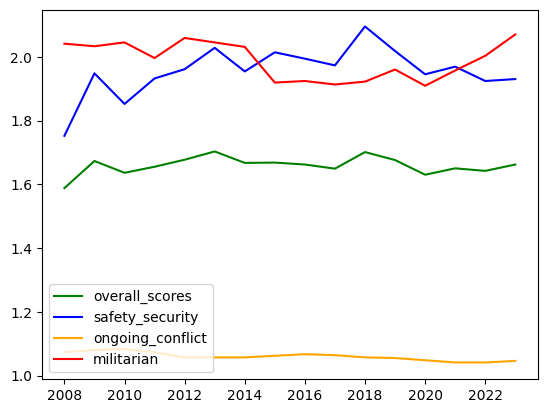

In [ ]:
def creando_grafico_paese(paese:str, nome_grafico:str):
    anni = list(map(int, cattegorie(index_csv, 2)))
    anni.sort()

    overall_scores = list(map(float, calcoli_paese(trovare_paese(paese))[0]))
    safety_security = list(map(float, calcoli_paese(trovare_paese(paese))[1]))
    ongoing_conflict = list(map(float, calcoli_paese(trovare_paese(paese))[2]))
    militarian = list(map(float, calcoli_paese(trovare_paese(paese))[3]))

    x  = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
    y1 = overall_scores
    y2 = safety_security
    y3 = ongoing_conflict
    y4 = militarian

    #plt.title(f'Indice di pace globale 2023 in {paese}')
    plt.plot(x, y1, color = "green", label="overall_scores")
    plt.plot(x, y2, color = "blue", label="safety_security")
    plt.plot(x, y3, color = "orange", label="ongoing_conflict")
    plt.plot(x, y4, color = "red", label="militarian")
    #plt.xlabel("Anni")
    #plt.ylabel("Punteggi")
    plt.savefig(nome_grafico)
    plt.legend()
    plt.show()

creando_grafico_paese(paese=paese_nome, nome_grafico=paese_nome)

##### Dados globais

In [ ]:
def medie_paesi_periodo():
    paesi = cattegorie(index_csv, 0)
    print(paesi)
    tutti = []
    for x in paesi:
        tutti.append(informazioni_paese(paese=x))
    return tutti

In [ ]:
def lista_string():
   tutti = medie_paesi_periodo()
   lista = []
   for x in tutti:
      x = [str(elemento) for elemento in x]
      stringa = '/ '.join(x)
      lista.append(stringa)
      #print(stringa)
   return lista

lista = lista_string()
print(lista)

['Ecuador', 'Trinidad and Tobago', 'Equatorial Guinea', 'India', 'Lebanon', 'Estonia', 'Bulgaria', 'Hungary', 'Angola', 'Uganda', 'Nicaragua', 'Burundi', 'Eswatini', 'Togo', 'Tunisia', 'Niger', 'Uzbekistan', 'Switzerland', 'Iraq', 'Moldova', 'Turkiye', 'Belgium', 'Bangladesh', 'Bhutan', 'Paraguay', 'Denmark', 'Guinea', 'Iran', 'Uruguay', 'Qatar', 'Cyprus', 'Argentina', 'Syria', 'Cuba', 'Malawi', 'Peru', 'Russia', 'Georgia', 'Israel', 'Philippines', 'Croatia', 'Zimbabwe', 'Spain', 'Chile', 'Republic of the Congo', 'Liberia', 'Tanzania', 'Haiti', 'Turkmenistan', 'El Salvador', 'Ethiopia', 'Vietnam', 'Armenia', 'Namibia', 'Colombia', 'Slovenia', 'Mauritania', 'Panama', 'Portugal', 'Serbia', 'Sierra Leone', "Cote d' Ivoire", 'Bolivia', 'Mauritius', 'Czech Republic', 'Iceland', 'Bosnia and Herzegovina', 'Guyana', 'Kyrgyz Republic', 'Gabon', 'Morocco', 'North Macedonia', 'France', 'Singapore', 'Tajikistan', 'Indonesia', 'Greece', 'Burkina Faso', 'Jordan', 'Bahrain', 'Kenya', 'Norway', 'Centr

In [ ]:
# Gruppetto dei cinque

data = lista_string()
print(data)

# Ordina i dati in base alla temperatura (dal più alto al più basso)
data.sort(key=lambda x: float(x.split('/')[1]), reverse=False)

def ordinando(data:list):
   ordine = 0
   paesi_in_ordine = []
   print(' \n ')
   print('--------------------------')
   for x in data:
      ordine = ordine + 1
      add = x + '/ ' + str(ordine)
      x = x.strip().split(sep='/')
      if x[0] == paese_nome:
         print('##############')
         print(f'{ordine}° {x[0]} --> Overall Scores {x[1]}')
         print('##############')
      paesi_in_ordine.append(add)
   #print(paesi_in_ordine)
   print('--------------------------')
   return paesi_in_ordine

ordinando(data)

def smistando(data:list):

   tre_primi = []
   tre_ultimi = []

   tre_primi.append(data[3])
   tre_primi.append(data[4])
   tre_primi.append(data[5])
   tre_ultimi.append(data[-5])
   tre_ultimi.append(data[-6])
   tre_ultimi.append(data[-7])

   return tre_primi, tre_ultimi


paesi_in_ordine = ordinando(data)
print(smistando(paesi_in_ordine)[0])
print(smistando(paesi_in_ordine)[1])

['Ecuador', 'Trinidad and Tobago', 'Equatorial Guinea', 'India', 'Lebanon', 'Estonia', 'Bulgaria', 'Hungary', 'Angola', 'Uganda', 'Nicaragua', 'Burundi', 'Eswatini', 'Togo', 'Tunisia', 'Niger', 'Uzbekistan', 'Switzerland', 'Iraq', 'Moldova', 'Turkiye', 'Belgium', 'Bangladesh', 'Bhutan', 'Paraguay', 'Denmark', 'Guinea', 'Iran', 'Uruguay', 'Qatar', 'Cyprus', 'Argentina', 'Syria', 'Cuba', 'Malawi', 'Peru', 'Russia', 'Georgia', 'Israel', 'Philippines', 'Croatia', 'Zimbabwe', 'Spain', 'Chile', 'Republic of the Congo', 'Liberia', 'Tanzania', 'Haiti', 'Turkmenistan', 'El Salvador', 'Ethiopia', 'Vietnam', 'Armenia', 'Namibia', 'Colombia', 'Slovenia', 'Mauritania', 'Panama', 'Portugal', 'Serbia', 'Sierra Leone', "Cote d' Ivoire", 'Bolivia', 'Mauritius', 'Czech Republic', 'Iceland', 'Bosnia and Herzegovina', 'Guyana', 'Kyrgyz Republic', 'Gabon', 'Morocco', 'North Macedonia', 'France', 'Singapore', 'Tajikistan', 'Indonesia', 'Greece', 'Burkina Faso', 'Jordan', 'Bahrain', 'Kenya', 'Norway', 'Centr

In [ ]:
def media_generale(cosa:int, lista):
   dati = lista
   data = []
   for i in dati:
      i_sep = i.split(sep='/')
      i = float(i_sep[cosa].strip())
      data.append(i)
   media = round(reduce(lambda x, y: x + y, data) / float(len(data)), 2)
   print(f'Valore maggiore: {max(data)} e minimo valore: {min(data)} -> Media: {media}')

print('Global')
print('Overall score:')
media_generale(1, data)
print('Security and protection')
media_generale(2, data)
print('Continuing conflict')
media_generale(3, data)
print('Military')
media_generale(4, data)

Global
Overall score:
Valore maggiore: 3.16 e minimo valore: 1.14 -> Media: 1.98
Security and protection
Valore maggiore: 3.82 e minimo valore: 1.22 -> Media: 2.3
Continuing conflict
Valore maggiore: 3.19 e minimo valore: 0.94 -> Media: 1.68
Military
Valore maggiore: 3.88 e minimo valore: 0.99 -> Media: 1.85
